In [ ]:
pip install kaggle


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alizazahid05","key":"87adbbe5ce9b94ae0e183181f63bcf49"}'}

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"


In [ ]:
!kaggle competitions download -c titanic



  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 2.74MB/s]


In [ ]:
!unzip titanic.zip


Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!ls


gender_submission.csv  kaggle.json  sample_data  test.csv  titanic.zip	train.csv


In [ ]:
#loading the Dataset
import pandas as pd
df1 = pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')
print(df1.head())
print(df2.head())
print(df1.info())
print(df2.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

Survived
0    549
1    342
Name: count, dtype: int64


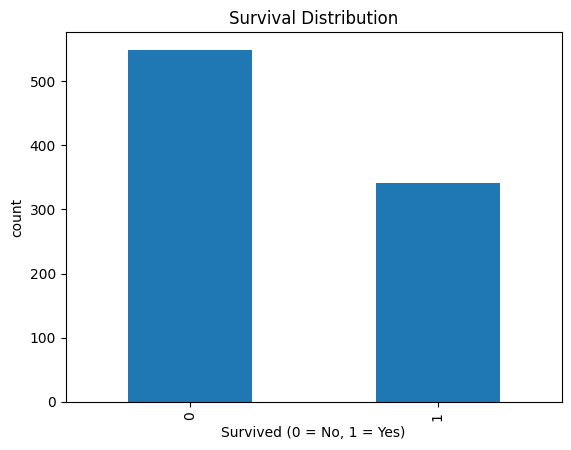

In [ ]:
#Trend realted to Survival
import matplotlib.pyplot as plt
sur=df1['Survived'].value_counts()
print(sur)
sur.plot(kind="bar")
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("count")
plt.show()

Pclass
1    136
2     87
3    119
dtype: int64


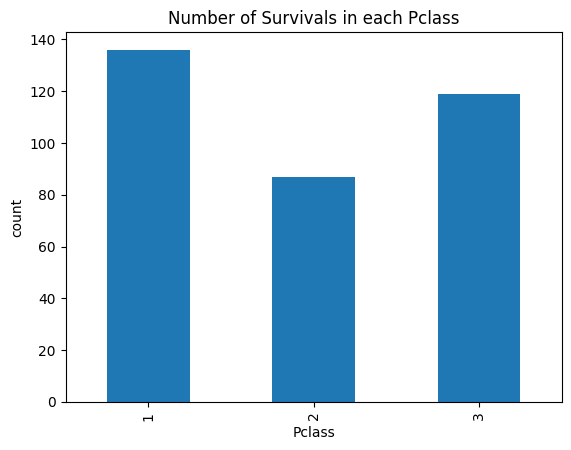

In [ ]:
#checking survival rate for pclass
who_sur_p = df1[df1['Survived']== 1].groupby('Pclass').size()
print(who_sur_p)
who_sur_p.plot(kind="bar")
plt.title("Number of Survivals in each Pclass")
plt.ylabel("count")
plt.show()

Sex
female    233
male      109
dtype: int64


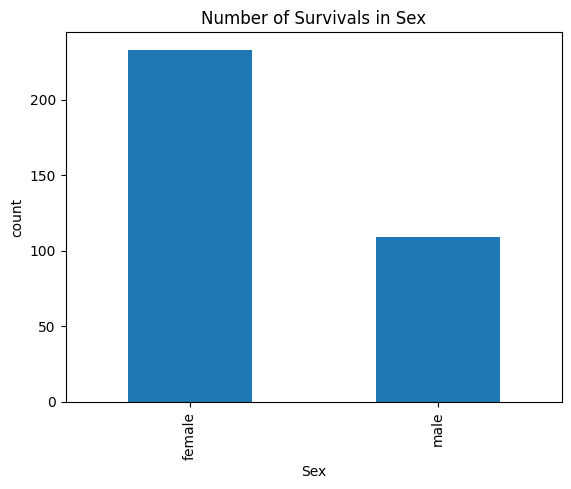

In [ ]:
#checking survival rate for Sex
who_sur_s = df1[df1['Survived']==1].groupby('Sex').size()
print(who_sur_s)
who_sur_s.plot(kind="bar")
plt.title("Number of Survivals in Sex")
plt.ylabel("count")
plt.show()

Embarked
C     93
Q     30
S    217
dtype: int64


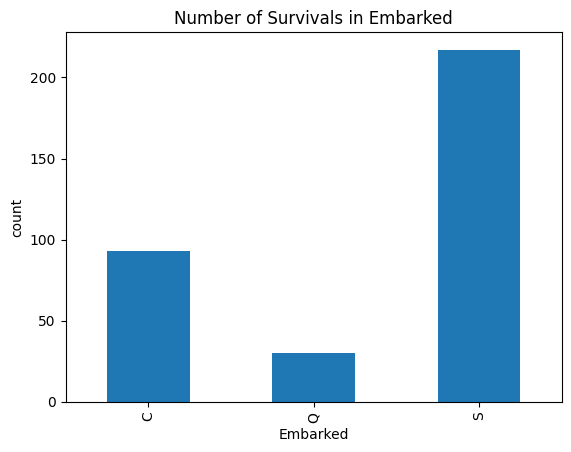

In [ ]:
who_sur_e=df1[df1['Survived']==1].groupby("Embarked").size()
print(who_sur_e)
who_sur_e.plot(kind="bar")
plt.title("Number of Survivals in Embarked")
plt.ylabel("count")
plt.show()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


Text(0, 0.5, 'Mean')

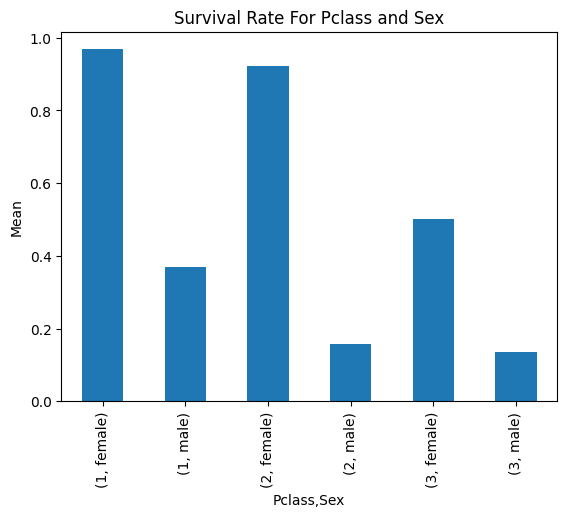

In [ ]:
#Survival Rate For Pclass and Sex
sur_by_class_and_sex = df1.groupby(['Pclass','Sex'])["Survived"].mean()
print(sur_by_class_and_sex)
sur_by_class_and_sex.plot(kind="bar")
plt.title("Survival Rate For Pclass and Sex")
plt.ylabel("Mean")

In [ ]:
#handling missing values
missing_values=df1[['Age','Cabin','Embarked']].isna().mean()
print(missing_values)
age_mean = df1['Age'].mean()
df1['Age']=df1['Age'].fillna(age_mean)
df1['Cabin']=df1["Cabin"].fillna('Unknown')
embarked_mode=df1['Embarked'].mode()[0]
df1['Embarked']=df1['Embarked'].fillna(embarked_mode)
print(df1)



Age         0.198653
Cabin       0.771044
Embarked    0.000000
dtype: float64
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.000000      1   
2                               Heikkinen, Miss. Laina    1  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.000000      1   
4                             Allen, Mr. William Henry    0 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
pd.set_option('future.no_silent_downcasting', True)
#Encoding Categorial Features sex
sex_mapping = {'male':0 , 'female':1}
df1['Sex']=df1['Sex'].replace(sex_mapping).infer_objects(copy=False)
df1['Sex'].unique()


array([0, 1])

In [ ]:
#Encoding Categorial Features Embarked
embarked_mapping={'S':0 ,'C':1,'Q':2}
df1['Embarked']=df1['Embarked'].replace(embarked_mapping)
df1['Embarked'].isna().sum()
df1['Embarked'].unique()

array([0, 1, 2], dtype=object)

In [ ]:
#Adding new feature family_size
df1['family_Size']= df1['SibSp'] +df1['Parch']+1
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_Size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,0,1


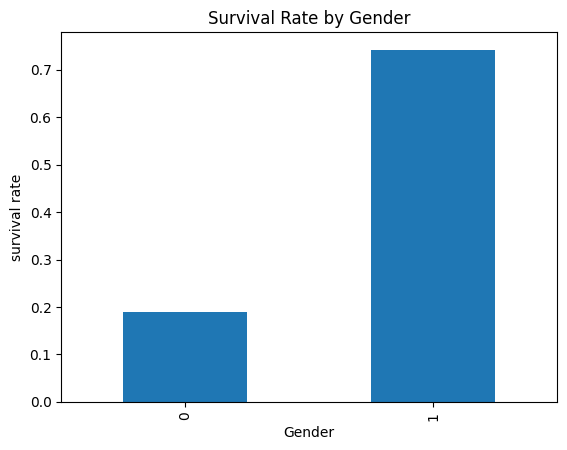

In [ ]:
#Visualize survival rates by gender
gender_survival_rate = df1.groupby('Sex')['Survived'].mean()
gender_survival_rate.plot(kind="bar")
plt.title('Survival Rate by Gender')
plt.xlabel("Gender")
plt.ylabel("survival rate")
plt.show()

<ipython-input-135-2ecac47f5ef5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = df1.groupby(pd.cut(df1['Age'],bins=age_bins))['Survived'].mean()


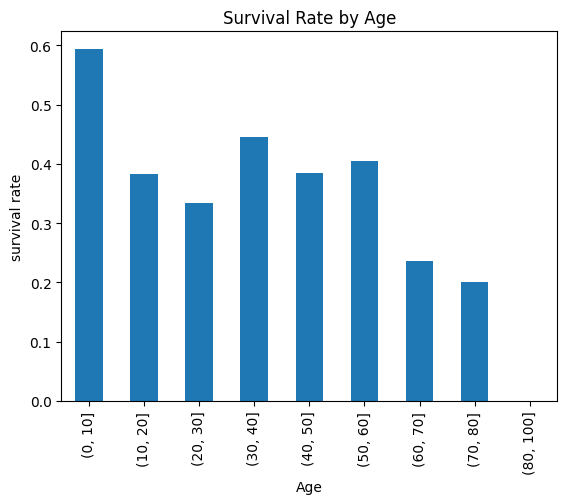

In [ ]:
#Visualize survival rates by age
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']
age_survival_rate = df1.groupby(pd.cut(df1['Age'],bins=age_bins))['Survived'].mean()
age_survival_rate.plot(kind='bar')
plt.title('Survival Rate by Age')
plt.xlabel("Age")
plt.ylabel("survival rate")
plt.show()

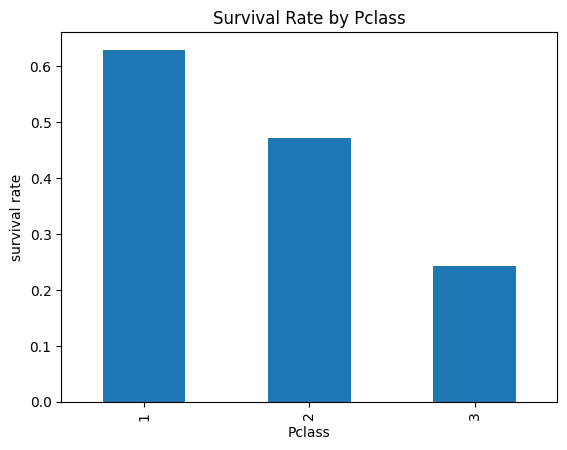

In [ ]:
#Visualize survival rates by pclass
survival_rate_by_pclass= df1.groupby('Pclass')['Survived'].mean()
survival_rate_by_pclass.plot(kind='bar')
plt.title('Survival Rate by Pclass')
plt.xlabel("Pclass")
plt.ylabel("survival rate")
plt.show()

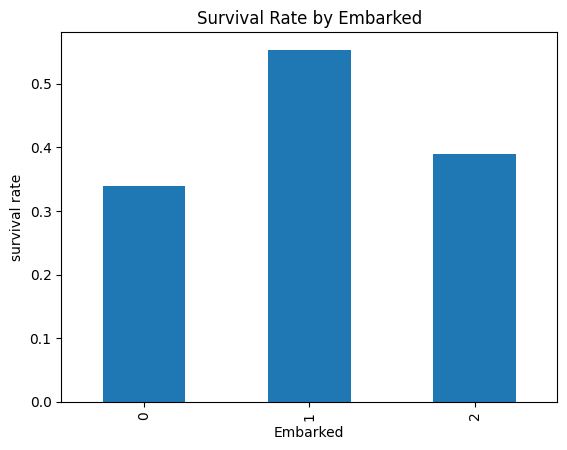

In [ ]:
#Visualize survival rates by Embarked
survival_rate_by_embarked=df1.groupby('Embarked')['Survived'].mean()
survival_rate_by_embarked.plot(kind='bar')
plt.title('Survival Rate by Embarked')
plt.xlabel("Embarked")
plt.ylabel("survival rate")
plt.show()